In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, chi2

from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, recall_score
 
from scipy.stats import randint

from imblearn.under_sampling import RandomUnderSampler

In [25]:
df = pd.read_csv('final_output.csv')
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,5,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,5,2,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,5,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,5,2,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,5,2,1,4,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,12,3,2,0,2,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,11,5,2,1,2,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,13,5,1,0,3,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,13,5,3,0,2,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,10,5,2,1,3,10.0,0,0,0


In [26]:
X = df.iloc[:, 1:16]
y = df.iloc[:, 0]

In [27]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [28]:
#scaling the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [29]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [30]:
#accuracy = metrics.accuracy_score(y_test, y_pred)
#accuracy

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred, zero_division = 1))
print("Precision:", metrics.precision_score(y_test, y_pred, zero_division = 1))
print("CL Report:", metrics.classification_report(y_test, y_pred, zero_division = 1))

Accuracy:  0.8635610312856674
Recall:  0.24615666178623719
Precision: 0.2259554808903822
CL Report:               precision    recall  f1-score   support

           0       0.93      0.92      0.93    116990
           1       0.23      0.25      0.24     10928

    accuracy                           0.86    127918
   macro avg       0.58      0.58      0.58    127918
weighted avg       0.87      0.86      0.87    127918



In [31]:
XX = df[['PhysicalHealth', 'AgeCategory', 'Stroke']]
YY = df[['HeartDisease']]

X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size = 0.3, random_state = 0)

In [32]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [33]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred, zero_division = 1))
print("Precision:", metrics.precision_score(y_test, y_pred, zero_division = 1))
print("CL Report:", metrics.classification_report(y_test, y_pred, zero_division = 1))

Accuracy:  0.9139453194217159
Recall:  0.029845291752954074
Precision: 0.45623836126629425
CL Report:               precision    recall  f1-score   support

           0       0.92      1.00      0.95     87730
           1       0.46      0.03      0.06      8209

    accuracy                           0.91     95939
   macro avg       0.69      0.51      0.51     95939
weighted avg       0.88      0.91      0.88     95939



In [34]:
#confusion matrix
#cm = confusion_matrix(y_test, y_pred)
#cm

In [35]:
df['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [36]:
#Taking care of imbalance in target variable

under_sample = RandomUnderSampler(sampling_strategy = 0.5)
X_resampled, y_resampled = under_sample.fit_resample(X_train, y_train)

In [37]:
clf = clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)

In [38]:
#accuracy check

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred, zero_division = 1))
print("Precision:", metrics.precision_score(y_test, y_pred, zero_division = 1))
print("CL Report:", metrics.classification_report(y_test, y_pred, zero_division = 1))

Accuracy:  0.8272443948759107
Recall:  0.483859178949933
Precision: 0.24354650806303269
CL Report:               precision    recall  f1-score   support

           0       0.95      0.86      0.90     87730
           1       0.24      0.48      0.32      8209

    accuracy                           0.83     95939
   macro avg       0.60      0.67      0.61     95939
weighted avg       0.89      0.83      0.85     95939



In [39]:
#Adjusting decision threshold
positive_class =clf.predict_proba(X_test)[:, 0]

In [40]:
adjusted_threshold = 0.3

In [41]:
adjusted_preds = (positive_class >= adjusted_threshold).astype(int)

In [42]:
print(confusion_matrix(y_test, adjusted_preds))

[[ 3055 84675]
 [ 1605  6604]]


In [43]:
print(classification_report(y_test, adjusted_preds))

              precision    recall  f1-score   support

           0       0.66      0.03      0.07     87730
           1       0.07      0.80      0.13      8209

    accuracy                           0.10     95939
   macro avg       0.36      0.42      0.10     95939
weighted avg       0.61      0.10      0.07     95939



In [44]:
#accuracy check

print('Accuracy: ', metrics.accuracy_score(y_test, adjusted_preds))
print('Recall: ', metrics.recall_score(y_test, adjusted_preds, zero_division = 1))
print("Precision:", metrics.precision_score(y_test, adjusted_preds, zero_division = 1))
print("CL Report:", metrics.classification_report(y_test, adjusted_preds, zero_division = 1))

Accuracy:  0.10067855616589708
Recall:  0.804482884638811
Precision: 0.07234960943919193
CL Report:               precision    recall  f1-score   support

           0       0.66      0.03      0.07     87730
           1       0.07      0.80      0.13      8209

    accuracy                           0.10     95939
   macro avg       0.36      0.42      0.10     95939
weighted avg       0.61      0.10      0.07     95939



In [45]:
#confusion matrix
cm = confusion_matrix(y_test, adjusted_preds)
cm

array([[ 3055, 84675],
       [ 1605,  6604]], dtype=int64)

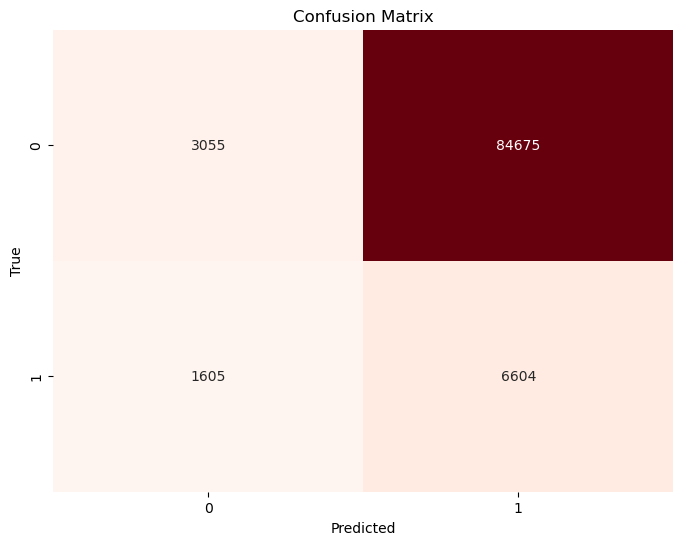

In [46]:
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Reds', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [47]:
predicted_labels = cross_val_predict(clf, X_resampled, y_resampled, cv =5)

In [48]:
cross_val_scores = cross_val_score(clf, X_resampled, y_resampled, cv = 5, scoring = 'recall')

In [49]:
print("Confusion Matrix")
print(confusion_matrix(y_resampled, predicted_labels))
print("\nClassification Report:")
print(classification_report(y_resampled, predicted_labels))
print("\nCross-Validation Accuracy Scores:", cross_val_scores)

Confusion Matrix
[[32874  5454]
 [ 9760  9404]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81     38328
           1       0.63      0.49      0.55     19164

    accuracy                           0.74     57492
   macro avg       0.70      0.67      0.68     57492
weighted avg       0.73      0.74      0.73     57492


Cross-Validation Accuracy Scores: [0.50195669 0.47560657 0.50208768 0.48082442 0.49308636]


In [50]:
conf_matrix = confusion_matrix(y_resampled, predicted_labels)
conf_matrix

array([[32874,  5454],
       [ 9760,  9404]], dtype=int64)

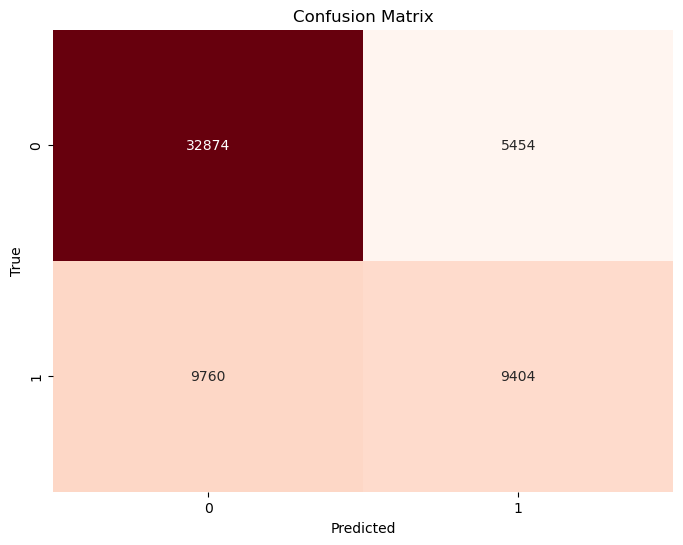

In [51]:
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Reds', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [52]:
#model pruning
pruned_model = DecisionTreeClassifier(ccp_alpha = 0.01, random_state = 42)
pruned_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [53]:
pruned_pred = pruned_model.predict(X_test)

In [54]:
#accuracy check

print('Accuracy: ', metrics.accuracy_score(y_test, pruned_pred))
print('Recall: ', metrics.recall_score(y_test, pruned_pred, zero_division = 1))
print("Precision:", metrics.precision_score(y_test, pruned_pred, zero_division = 1))
print("CL Report:", metrics.classification_report(y_test, pruned_pred, zero_division = 1))

Accuracy:  0.9064718206360292
Recall:  0.13850651723717872
Precision: 0.37425938117182356
CL Report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95     87730
           1       0.37      0.14      0.20      8209

    accuracy                           0.91     95939
   macro avg       0.65      0.56      0.58     95939
weighted avg       0.88      0.91      0.89     95939



In [55]:
print("Confusion Matrix")
print(confusion_matrix(y_test, pruned_pred))

Confusion Matrix
[[85829  1901]
 [ 7072  1137]]


In [56]:
#Hyperparameter tuning using GridSearch
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2, 4]
}

In [57]:
hyper_model = DecisionTreeClassifier(random_state = 42)

In [58]:
grid_search = GridSearchCV(hyper_model, param_grid, cv = 5, scoring = 'recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [89]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [92]:
best_model = grid_search.best_estimator_
best_predictions = best_model.predict(X_test)
best_recall = recall_score(y_test, best_predictions)
print("Best Model Recall:", best_recall)

Best Model Recall: 0.029845291752954074


In [66]:
#Hyperparameter tuning using Random search
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

In [67]:
random_model = DecisionTreeClassifier(random_state = 42)

In [68]:
random_search = RandomizedSearchCV(random_model, param_distributions = param_dist, n_iter = 50, cv = 5, scoring = 'recall', random_state = 42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E8383B2CD0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E8383B27F0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E8386580A0>},
                   random_state=42, scoring='recall')

In [69]:
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 14, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [70]:
best_model = random_search.best_estimator_
best_predictions = best_model.predict(X_test)
best_recall = recall_score(y_test, best_predictions)
print("Best Model Recall:", best_recall)

Best Model Recall: 0.03008892678767207


In [71]:
#confusion matrix
cm1 = confusion_matrix(y_test, best_predictions)
cm1

array([[87439,   291],
       [ 7962,   247]], dtype=int64)

In [72]:
#accuracy check

print('Accuracy: ', metrics.accuracy_score(y_test, best_predictions))
print('Recall: ', metrics.recall_score(y_test, best_predictions, zero_division = 1))
print("Precision:", metrics.precision_score(y_test, best_predictions, zero_division = 1))
print("CL Report:", metrics.classification_report(y_test, best_predictions, zero_division = 1))

Accuracy:  0.913976589291112
Recall:  0.03008892678767207
Precision: 0.4591078066914498
CL Report:               precision    recall  f1-score   support

           0       0.92      1.00      0.95     87730
           1       0.46      0.03      0.06      8209

    accuracy                           0.91     95939
   macro avg       0.69      0.51      0.51     95939
weighted avg       0.88      0.91      0.88     95939



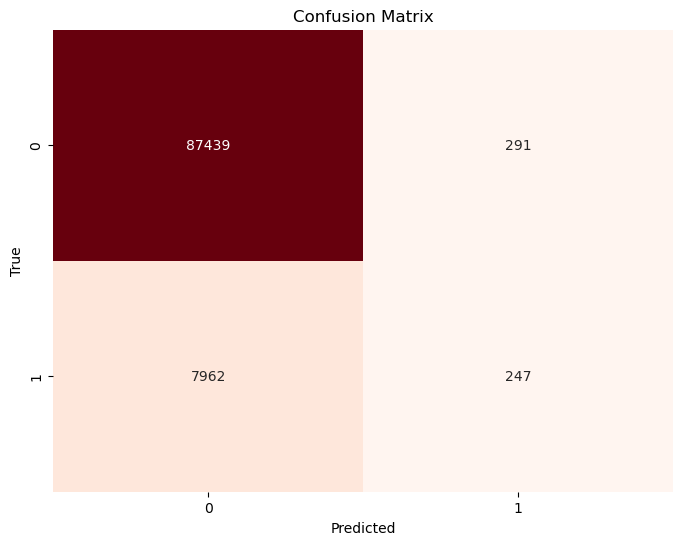

In [73]:
plt.figure(figsize = (8, 6))
sns.heatmap(cm1, annot = True, fmt = 'd', cmap = 'Reds', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()